In [20]:
import numpy as np
from scipy import stats
import pymc3 as pm
import arviz as az

模拟获得采样数据

In [21]:
np.random.seed(42)
trials = 20
theta = 0.5 # 正面朝上的概率
samples = stats.bernoulli.rvs(p=theta, size=trials)

In [22]:
samples

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

对$\theta$分布进行估计

d:\Anaconda3\envs\pymc3_bayesian_env\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [theta]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 17 seconds.


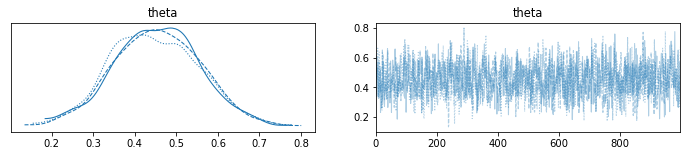

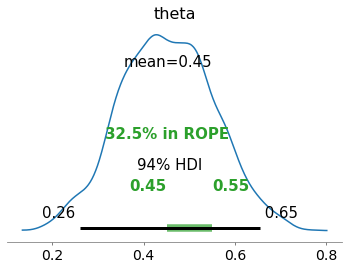

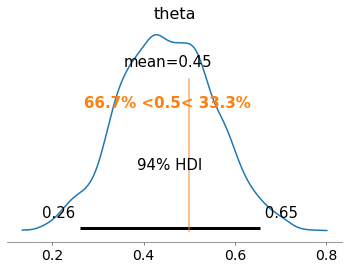

In [24]:
with pm.Model() as our_first_model:
    # 采样一个theta先验
    theta = pm.Beta("theta", alpha=1, beta=1)
    
    # 根据上述先验获得似然
    y = pm.Bernoulli("y", p=theta, observed=samples)
    
    # 对theta随机采样推理
    trace = pm.sample(1000, random_seed=42)
    
    # 总结后验
    az.plot_trace(trace)
    az.summary(trace)
    
    az.plot_posterior(trace, rope=[0.45, 0.55])
    az.plot_posterior(trace, ref_val=0.5)